In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import pandas_datareader.data as web
from pandas_datareader import Options #Experimental
from datetime import datetime
import quandl
quandl.ApiConfig.api_key = 'JgrixskwB3MtGDkJtxms'
%matplotlib inline

In [ ]:
# Time Index

In [3]:
my_year = 1974
my_month = 3
my_day = 30
my_hour = 23
my_minute = 30
my_sec = 42

In [9]:
my_date = datetime(my_year, my_month, my_day, my_hour, my_minute, my_sec)
my_date.hour
my_date.minute
my_date.year

1974

In [11]:
first_two = [datetime(2016,1,1), datetime(2017,8,1)]
first_two

[datetime.datetime(2016, 1, 1, 0, 0), datetime.datetime(2017, 8, 1, 0, 0)]

In [13]:
dt_indx = pd.DatetimeIndex(first_two)
dt_indx

DatetimeIndex(['2016-01-01', '2017-08-01'], dtype='datetime64[ns]', freq=None)

In [16]:
data = np.random.randn(2,2)
cols = ['a','b']
data

array([[-0.10819612,  1.09545702],
       [-0.02926722,  0.19822629]])

In [17]:
df = pd.DataFrame(data, dt_indx, cols)
df

,a,b
2016-01-01,-0.108196,1.095457
2017-08-01,-0.029267,0.198226


In [18]:
df.index.argmax() # i.e. rows 0 and 1 therefore max is 1

1

In [19]:
df.index.max()

Timestamp('2017-08-01 00:00:00')

In [20]:
df.index.argmin()

0

In [21]:
df.index.min()

Timestamp('2016-01-01 00:00:00')

In [ ]:
# Time resampling

In [29]:
df = pd.read_csv('walmart_stock.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [30]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [31]:
df = pd.read_csv('walmart_stock.csv', index_col='Date', parse_dates=True)

In [32]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [ ]:
# For time resampling, we will need a datetime index

In [34]:
df.resample(rule='A').mean() # Year end. See lecture notes

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349
2013-12-31,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179
2014-12-31,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712
2015-12-31,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426
2016-12-31,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229


In [35]:
df.resample(rule='Q').mean() # Quarterly. See Lecture Notes

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-31,60.462903,60.807258,60.160484,60.519516,8.850221e+06,52.881839
2012-06-30,62.888889,63.400159,62.592222,63.057143,1.155795e+07,55.594392
2012-09-30,73.081587,73.549682,72.717619,73.174921,7.871587e+06,64.891949
2012-12-31,72.174678,72.623226,71.647741,72.079839,8.660958e+06,64.161672
2013-03-31,70.898834,71.393000,70.552666,71.026000,8.482003e+06,63.581880
2013-06-30,76.873906,77.417813,76.413281,76.885781,7.656086e+06,69.393600
2013-09-30,75.637969,76.030469,75.213594,75.629063,5.796625e+06,68.676662
2013-12-31,77.372656,77.805313,76.924531,77.472813,5.966927e+06,70.651242
2014-03-31,75.339344,75.802787,74.863278,75.337213,7.050402e+06,69.106983


In [36]:
df.resample(rule='A').max()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,77.599998,77.599998,76.690002,77.150002,38007300,68.568371
2013-12-31,81.209999,81.370003,80.820000,81.209999,25683700,73.929868
2014-12-31,87.080002,88.089996,86.480003,87.540001,22812400,81.707680
2015-12-31,90.800003,90.970001,89.250000,90.470001,80898100,84.914216
2016-12-31,74.500000,75.190002,73.629997,74.300003,35076700,73.233524


In [39]:
#Custom resampling rule
def first_day(entry):
    return entry[0]
print(df.resample(rule='A').mean())
print(df.resample(rule='A').apply(first_day))

                 Open       High        Low      Close        Volume  \
Date                                                                   
2012-12-31  67.158680  67.602120  66.786520  67.215120  9.239015e+06   
2013-12-31  75.264048  75.729405  74.843055  75.320516  6.951496e+06   
2014-12-31  77.274524  77.740040  76.864405  77.327381  6.515612e+06   
2015-12-31  72.569405  73.064167  72.034802  72.491111  9.040769e+06   
2016-12-31  69.481349  70.019643  69.023492  69.547063  9.371645e+06   

            Adj Close  
Date                   
2012-12-31  59.389349  
2013-12-31  68.147179  
2014-12-31  71.709712  
2015-12-31  68.831426  
2016-12-31  68.054229  
                 Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-12-31  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2013-12-31  68.930000  69.239998  68.449997  69.239998  10390800  61.879708
2014-12-31  78.720001  

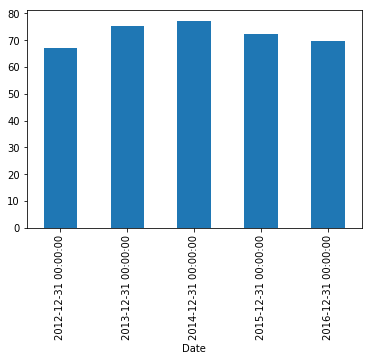

In [40]:
df['Close'].resample(rule='A').mean().plot(kind='bar')

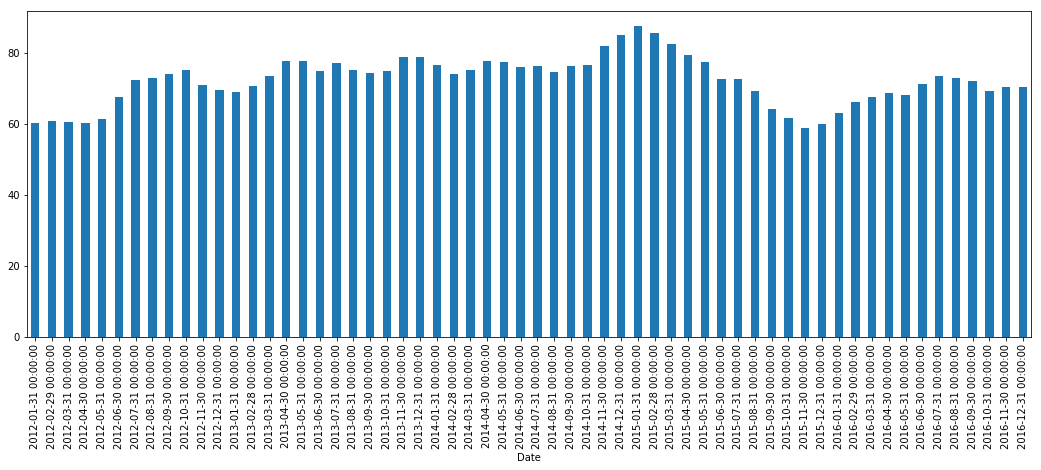

In [43]:
df['Close'].resample(rule='M').mean().plot(kind='bar', figsize=(18,6))

In [ ]:
# Time Shifting

In [44]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [45]:
df.shift(periods=1).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220


In [46]:
df.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087
2016-12-29,69.209999,69.519997,69.120003,69.260002,4298400,68.754456
2016-12-30,69.120003,69.430000,68.830002,69.120003,6889500,68.615479


In [48]:
df.shift(periods=-1).tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240
2016-12-27,69.940002,70.000000,69.260002,69.309998,4875700.0,68.804087
2016-12-28,69.209999,69.519997,69.120003,69.260002,4298400.0,68.754456
2016-12-29,69.120003,69.430000,68.830002,69.120003,6889500.0,68.615479
2016-12-30,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [50]:
df.tshift(freq='M').head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [51]:
df.tshift(freq='A').head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-12-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-12-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-12-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-12-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
